# Problem 5: Collaborative Filtering

In [25]:
import numpy as np
import pandas as pd
from fastai.tabular import *
from fastai.collab import *

In [26]:
df = pd.read_csv('./data/songsDataset.csv', header=0, names=['userId', 'songId', 'rating'])
df.head()

,userId,songId,rating
0,0,7171,5
1,0,8637,4
2,0,21966,4
3,0,35821,5
4,0,82446,5


In [28]:
dls = CollabDataBunch.from_df(df, valid_pct=0.2)

In [29]:
dls.show_batch()

userId,songId,target
196518,69985,4.0
187018,109226,4.0
197335,27532,4.0
131375,112493,5.0
60354,119174,3.0


In [30]:
df['rating'].min(), df['rating'].max()

(1, 5)

In [31]:
y_range = [0.5, 5.5]

In [32]:
learn = collab_learner(dls, n_factors=30, y_range=y_range)

In [33]:
learn.fit_one_cycle(5, 0.005)

epoch,train_loss,valid_loss,time
0,2.288168,2.277957,04:15
1,2.023091,2.080391,04:13
2,1.676190,2.018611,04:15
3,1.288638,2.001664,04:13
4,0.957745,2.002670,04:15


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


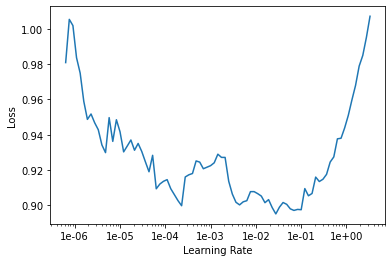

In [36]:
learn.lr_find()
learn.recorder.plot()